In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

# K-Means clustering in 35 lines of python

### Intro
### Clustering is an [unsupervised learning](https://en.wikipedia.org/wiki/Unsupervised_learning) technique for finding segments of your data that are similar.
For example: If you were to cluster points on a two dimensional plane, your clusters would be groupings of your points that are in close physical proximity to one another.

Image - before  
Image - after  

In this guide we're just going to implement the core concepts of a clustering algorithm.
The core of our algorithm is:
  1. randomly choose n cluster centroids.
  2. until convergence:
  
      a. assign each data point to a cluster according to the nearest cluster centroid.  
      b. compute new centroids based on the mean of all points in the cluster.
      
In general, before clustering, you will want to scale your features so some dimensons don't end up dominating others.  
In this guide, we will be using [pandas](http://pandas.pydata.org/) simplify data manipulation.  
Also if you just want the code, it's here.

### Conclusion
Though there are many things to consider when building and using clustering algorithms, won't dig into them now. Some things you could think about later though are:

  - How to choose cluster centroids
  - Running your cluster several times so you don't end up less desirable convergence
  - When to stop your algorithm
  - How to choose the number of clusters to use
  - Choosing a different distance function
  - many more things!

* scale features - When you use a clustering algorithm, it's important that you scale your features appropriates so some dimensons don't end up dominating others.
* choose how many clusters you want
* choose cluster centroids
* assign points to centroids
* recompute centroids based on average of cluster
* go until you converge or your surpass max number of runs

In this guide we're just going to implement the core concepts of a clustering algorithm.
The core of the algorithm is:
  1. choose n cluster centroids
  2. assign all data points to their nearest cluster
  3. computer new centroids based on the mean of all points in the cluster

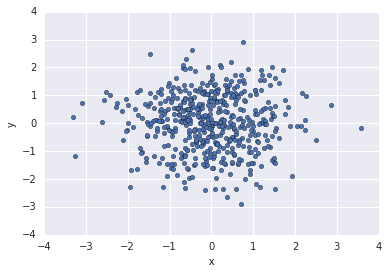

In [165]:
random_frame = pd.DataFrame(np.random.randn(500, 2), columns=["x", "y"])
df.plot(kind='scatter', x='x', y='y')

1


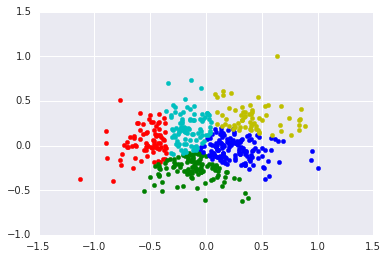

2


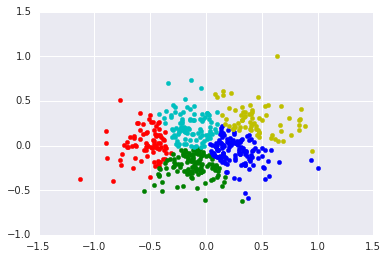

3


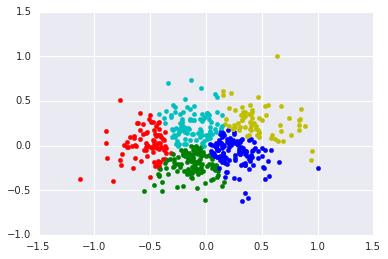

4


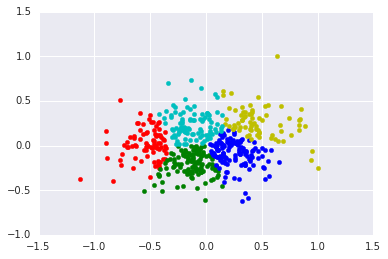

5


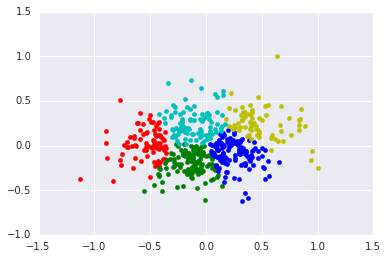

6


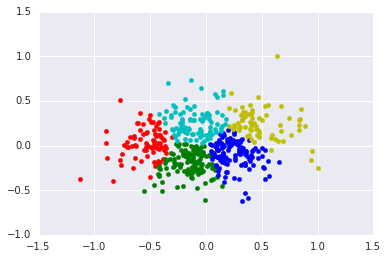

7


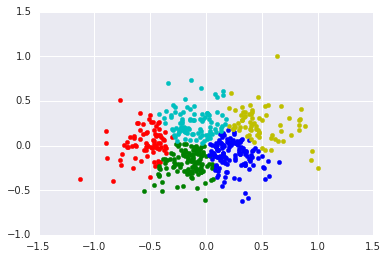

8


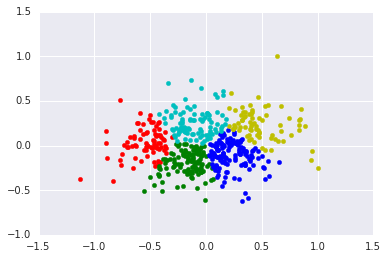

9


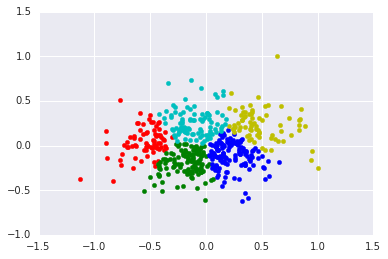

10


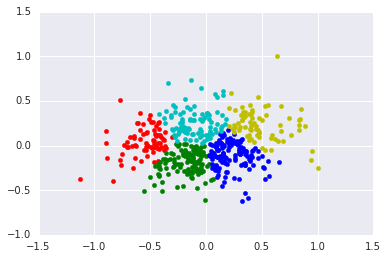

11


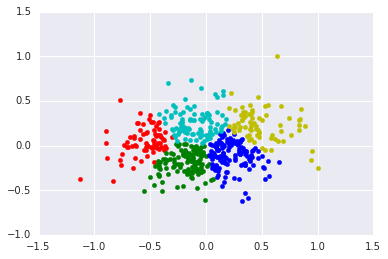

In [169]:
import pandas as pd
from numpy import square, sqrt, setdiff1d

CLUSTER = "cluster"

def cluster(frame, n_clusters=5, n_iter=1000):
    cols = setdiff1d(scaled.columns.tolist(), [CLUSTER]) # get the columns well use without the cluster
    centroids = frame.sample(n_clusters) # randomly pick clusters. There are other ways to pick.
    ii = 0
    while True:
        ii += 1
        print(ii)
        frame[CLUSTER] = _cluster_assignments(frame[cols], centroids[cols])
        old_centroids = centroids.copy(deep=True)
        centroids = scaled.groupby(CLUSTER).mean()
        scatter_plot_colored(frame)
        if old_centroids[cols].equals(centroids[cols]) or ii > n_iter:
            break
    return frame[CLUSTER]

def _cluster_assignments(frame, centroids):
    return scaled.apply(lambda x: _find_closest(x, centroids), axis=1) # assign each point to a cluster
    
def _find_closest(point, points):
    distances = points.apply(_dist_from(point), axis=1)
    return distances.reset_index().sort_values(by=0).iloc[0].name

def _dist_from(point):
    return lambda x: _dist(x, point)
    
def _dist(point_one, point_two):
    return sqrt(square((point_one - point_two)).sum())

scaled = random_frame / random_frame.max()
random_frame["cluster"] = cluster(scaled, n_iter=10)

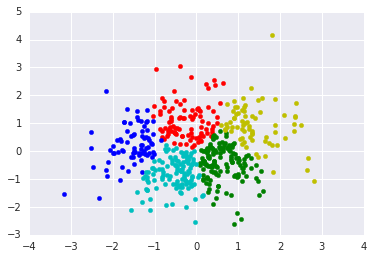

In [168]:
import seaborn as sns
from matplotlib import pyplot as plt

color_codes = {
    0: 'r',
    1: 'g',
    2: 'b',
    3: 'y',
    4: 'c'
}

def scatter_plot_colored(frame):
    for (cluster, color) in color_codes.items():
        rows = frame[frame["cluster"] == cluster]
        plt.scatter(rows["x"], rows["y"], color=color)
    plt.show()
    
scatter_plot_colored(random_frame)

### Assign points to clusters

In [100]:
def _cluster_assignments(frame, centroids):
    return scaled.apply(lambda x: _find_closest(x, centroids), axis=1) # assign each point to a cluster
    
def _find_closest(point, points):
    distances = points.apply(_dist_from(point), axis=1)
    return distances.reset_index().sort_values(by=0).iloc[0].name

def _dist_from(point):
    return lambda x: _dist(x, point)
    
def _dist(point_one, point_two):
    return sqrt(square((point_one - point_two)).sum())

### Recomputing cluster centroids